In [453]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [455]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [457]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [460]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_data = StandardScaler().fit_transform(market_data_df)

In [462]:
# Create a DataFrame with the scaled data
scaled_market_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns)

# Copy the crypto names from the original data
crypto_names = market_data_df.index

# Set the coinid column as index
scaled_market_data_df.index = crypto_names

# Display sample data
scaled_market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [465]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop: 
for i in k:
# 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=0)
# 2. Fit the model to the data using the scaled DataFrame
    k_model.fit(scaled_market_data_df)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data ={"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
display(df_elbow.head(10))




C:\Users\reggi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reggi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reggi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reggi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


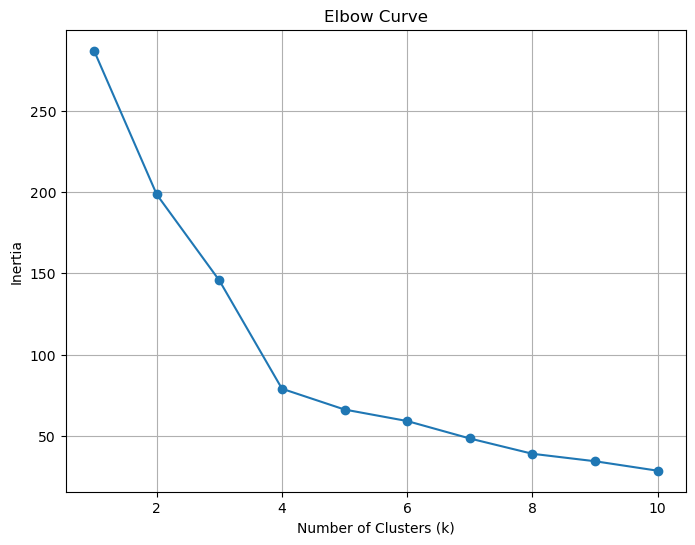

In [467]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(elbow_data["k"], elbow_data["inertia"], marker="o")
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()



#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [471]:
# Initialize the K-Means model using the best value for k
kmeans_model_4 = KMeans(n_clusters=4, random_state=0)

In [473]:
# Fit the K-Means model using the scaled data
kmeans_model_4.fit(scaled_market_data_df)

C:\Users\reggi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [475]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans_model_4.predict(scaled_market_data_df)


# View the resulting array of cluster values.
print(predicted_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [477]:
# Create a copy of the DataFrame
scaled_market_data_df_copy = scaled_market_data_df.copy()

In [479]:
# Add a new column to the DataFrame with the predicted clusters
scaled_market_data_df["Predicted_Cluster"] = predicted_clusters

# Display sample data
scaled_market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Predicted_Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


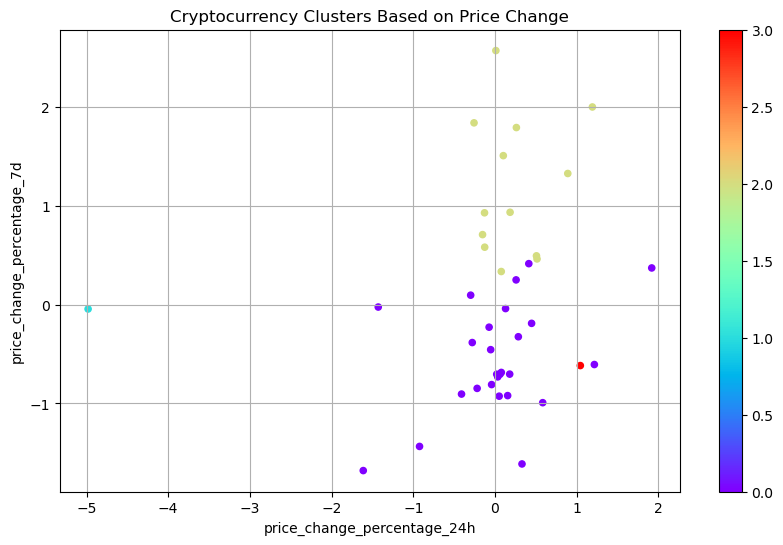

In [481]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
scaled_market_data_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c=scaled_market_data_df["Predicted_Cluster"],
    colormap="rainbow",
    figsize=(10, 6),
    title= "Cryptocurrency Clusters Based on Price Change"
)
plt.grid(True)
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [484]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [486]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca_model.fit_transform(scaled_market_data_df)

# View the first five rows of the DataFrame. 
pca_data[:5]

array([[ 1.19408229, -0.90207402, -0.58533763],
       [ 1.00970605, -0.66358438, -1.13695032],
       [-0.72253591, -0.30763241,  0.7218133 ],
       [-0.74826646, -0.33237895,  0.55847869],
       [ 2.25853853, -1.82696614, -1.37816649]])

In [488]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_
explained_variance

array([0.37269822, 0.32489961, 0.18917649])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8868

In [491]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pca_columns = ["PCA1", "PCA2", "PCA3"]

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Copy the crypto names from the original data
crypto_names = scaled_market_data_df.index

# Set the coinid column as index
pca_df.index = crypto_names

# Display sample data
pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,1.194082,-0.902074,-0.585338
ethereum,1.009706,-0.663584,-1.136950
tether,-0.722536,-0.307632,0.721813
ripple,-0.748266,-0.332379,0.558479
bitcoin-cash,2.258539,-1.826966,-1.378166
binancecoin,1.719188,-0.993613,-0.663561
chainlink,1.396401,-0.721542,-2.731341
cardano,1.359187,-0.651114,-1.482162
litecoin,0.869062,-0.828724,-0.856779


### Find the Best Value for k Using the PCA Data

In [494]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
pca_inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for i in k_values:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=i, random_state=0)
# 2. Fit the model to the data using PCA DataFrame.
    kmeans_model.fit(pca_df)
# 3. Append the model.inertia_ to the inertia list
    pca_inertia_values.append(kmeans_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {"k": list(k_values), "inertia": pca_inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(pca_elbow_data)

# Display the DataFrame
display(pca_elbow_df.head(10))


C:\Users\reggi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reggi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reggi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\reggi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

,k,inertia
0,1,290.018457
1,2,203.033247
2,3,112.401201
3,4,43.586433
4,5,32.255267
5,6,27.673224
6,7,27.104545
7,8,17.481314
8,9,15.271690
9,10,12.229214


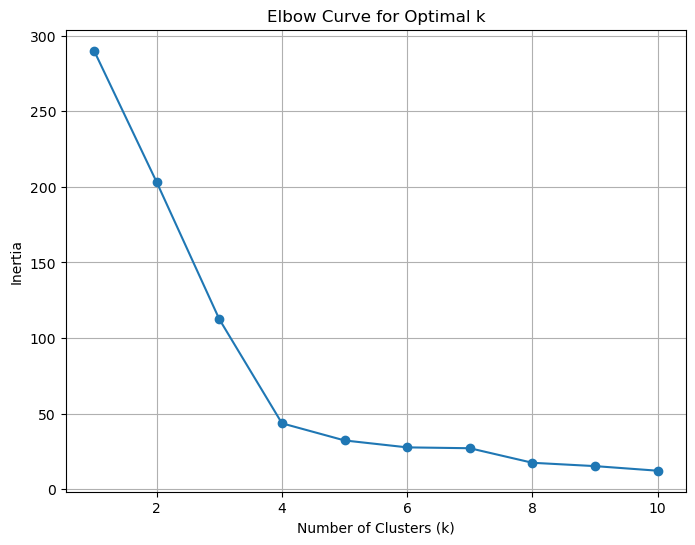

In [495]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(pca_elbow_df["k"], pca_elbow_df["inertia"], marker="o")
plt.title("Elbow Curve for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [500]:
# Initialize the K-Means model using the best value for k
kmeans_best_4 = KMeans(n_clusters=4, random_state=0)

In [502]:
# Fit the K-Means model using the PCA data
kmeans_best_4.fit(pca_df)

C:\Users\reggi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [504]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_predicted_clusters = kmeans_best_4.predict(pca_df)

# Print the resulting array of cluster values.
print(pca_predicted_clusters)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [506]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df["Crypto_Cluster"] = pca_predicted_clusters

# Display sample data
pca_df.head()


,PCA1,PCA2,PCA3,Crypto_Cluster
coin_id,,,,
bitcoin,1.194082,-0.902074,-0.585338,1
ethereum,1.009706,-0.663584,-1.136950,1
tether,-0.722536,-0.307632,0.721813,0
ripple,-0.748266,-0.332379,0.558479,0
bitcoin-cash,2.258539,-1.826966,-1.378166,1


In [508]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas
pca_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="Crypto_Cluster",
    colormap="rainbow",
    title="Cryptocurrency Clusters (PCA1 and PCA2)"
)


:Scatter   [PCA1]   (PCA2,Crypto_Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [511]:
# Use the columns from the original scaled DataFrame as the index.
pca_df.index = scaled_market_data_df.index
pca_df.head()


,PCA1,PCA2,PCA3,Crypto_Cluster
coin_id,,,,
bitcoin,1.194082,-0.902074,-0.585338,1
ethereum,1.009706,-0.663584,-1.136950,1
tether,-0.722536,-0.307632,0.721813,0
ripple,-0.748266,-0.332379,0.558479,0
bitcoin-cash,2.258539,-1.826966,-1.378166,1


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** tether & bitcoin-cash
    